In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Checking Hamiltonian

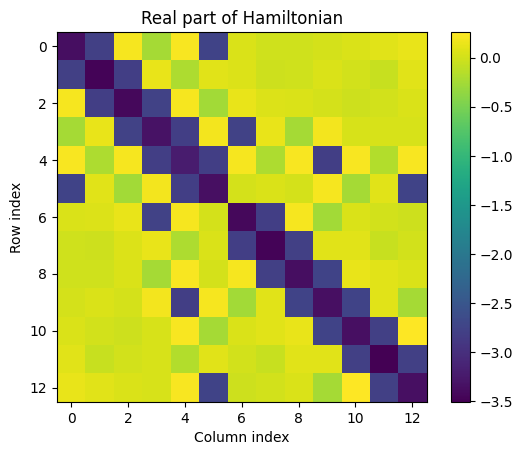

In [3]:
H = np.load("output/hamiltonian.npy")
plt.imshow(H.real, cmap="viridis")
plt.colorbar()
plt.title("Real part of Hamiltonian")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()

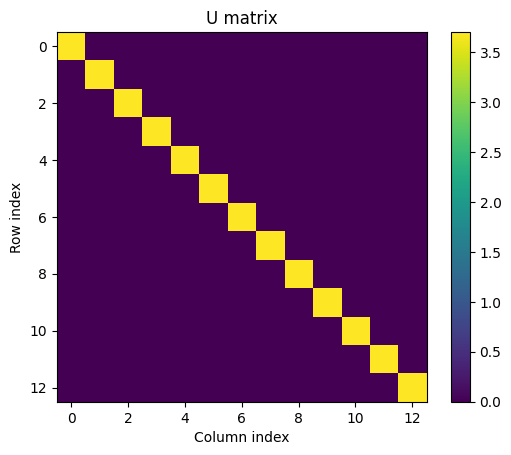

In [6]:
# Create a U matrix with the same shape as H. The diagonal elements are 3.7 and the off-diagonal elements are 0.0. Plot this matrix as well and save it to a file named "output/U_matrix.txt".
U = np.zeros_like(H, dtype=np.float64)
np.fill_diagonal(U, 3.7)
plt.imshow(U, cmap="viridis")
plt.colorbar()
plt.title("U matrix")
plt.xlabel("Column index")
plt.ylabel("Row index")
plt.show()
np.savetxt("output/U_matrix.txt", U)

In [7]:
# Create an occupancies.npy file that contains a 1D array of length equal to the number of rows in H, and all elements are 1.0. Save this file in the output directory.
occupancies = np.ones(H.shape[0], dtype=np.float64)
np.save("output/occupancies.npy", occupancies)

In [10]:
DC0 = np.diag(U.diagonal() * (occupancies - 0.5))
dc0_diag = DC0.diagonal()
dc0_diag

array([1.85, 1.85, 1.85, 1.85, 1.85, 1.85, 1.85, 1.85, 1.85, 1.85, 1.85,
       1.85, 1.85])